In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [3]:
df = pd.read_csv('HateSpeechDatasetBalanced.csv')

In [4]:
df.head(10)

,Content,Label
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1
5,yeah retard haha,1
6,the ching chong chung stuff,1
7,the dead what a slut still warm when she tweet...,1
8,let your tweets be harmless it will not affect...,1
9,these latinos who have a problem with immigrat...,1


In [5]:
df['Label']

0         1
1         1
2         1
3         1
4         1
         ..
726114    1
726115    1
726116    1
726117    1
726118    1
Name: Label, Length: 726119, dtype: int64

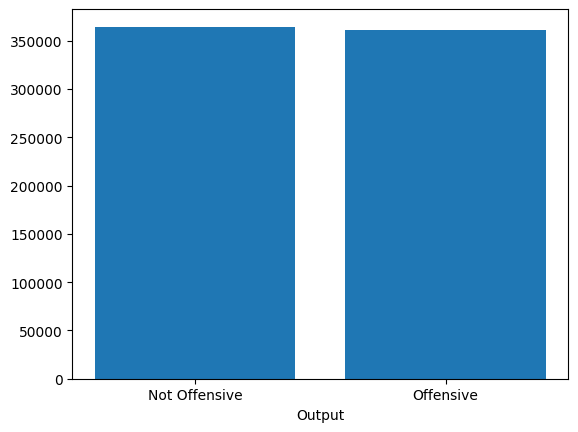

In [6]:
# Class Distribution
plt.bar(['Not Offensive','Offensive'],df['Label'].value_counts())
plt.xlabel('Output')
plt.show()

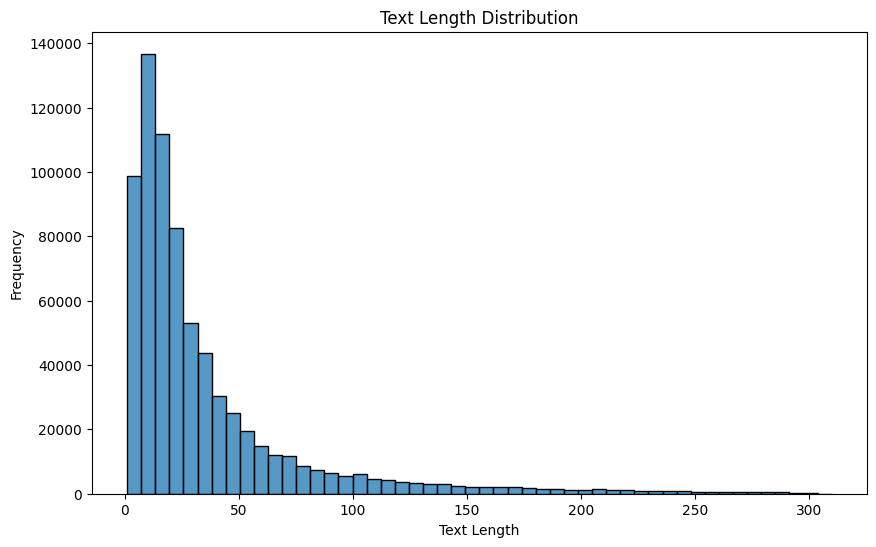

In [7]:
# Text Length Distribution
df['Text Length'] = df['Content'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Text Length', bins=50)
plt.title("Text Length Distribution")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

In [8]:
# Word Frequency Analysis
from collections import Counter
word_counter = Counter(' '.join(df['Content']).split())
most_common_words = word_counter.most_common(50)
print("Most common words:", most_common_words)

Most common words: [('the', 994310), ('to', 667526), ('a', 645845), ('you', 628167), ('i', 584204), ('and', 516276), ('is', 483592), ('of', 462209), ('that', 355158), ('it', 345768), ('not', 343377), ('in', 308875), ('are', 268864), ('for', 230784), ('this', 217087), ('on', 201631), ('what', 195586), ('be', 193169), ('have', 190199), ('your', 162671), ('as', 154781), ('with', 154184), ('do', 149906), ('my', 129073), ('if', 126936), ('but', 124617), ('or', 116146), ('so', 108360), ('me', 106927), ('slut', 103051), ('they', 101092), ('all', 100578), ('will', 96074), ('am', 95381), ('article', 94144), ('s', 91675), ('just', 91549), ('an', 90718), ('about', 90121), ('like', 90084), ('from', 89344), ('at', 87068), ('by', 84439), ('no', 81233), ('page', 80793), ('can', 76850), ('there', 76744), ('would', 76194), ('he', 76097), ('wikipedia', 71558)]


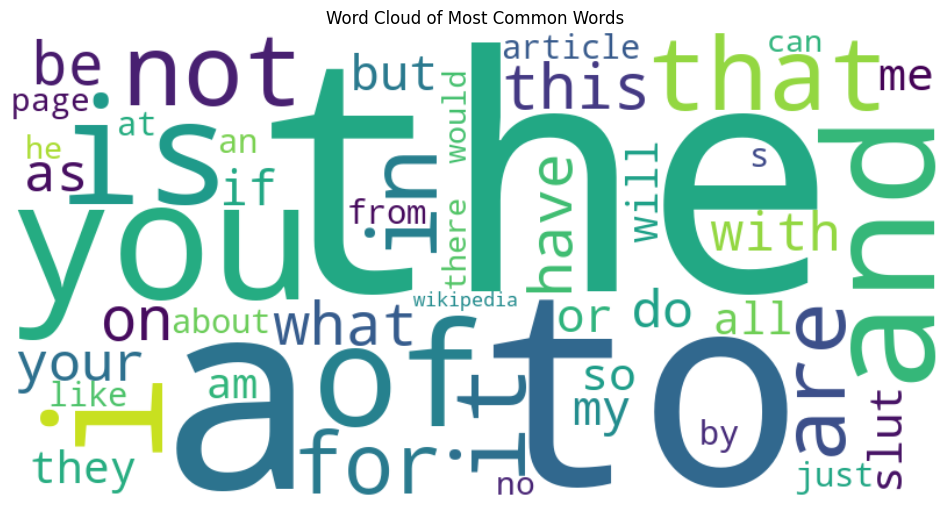

In [9]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_words))

# Display the word cloud using matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words')
plt.show()

# PART 1

In [10]:
# Removing Stopwords
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [11]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
stop_words = set(stopwords.words('english'))

In [13]:
def process_sentence(sentence):
    words = word_tokenize(sentence)
    filtered_tokens = [word for word in words if word.lower() not in stop_words]
    return filtered_tokens

In [14]:
df['filtered_data'] = df['Content'].apply(process_sentence)

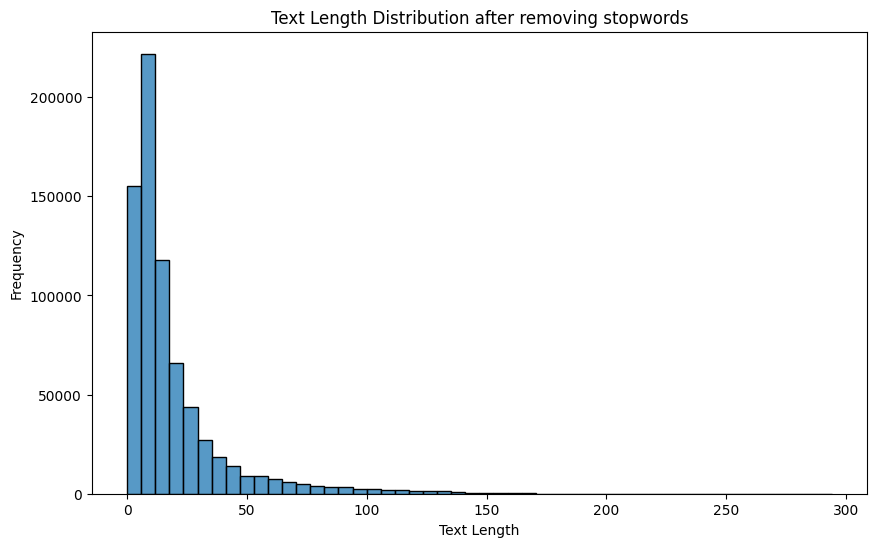

In [15]:
# Text Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df,x=df['filtered_data'].apply(lambda x: len(x)), bins=50)
plt.title("Text Length Distribution after removing stopwords")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

In [16]:
# Tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['filtered_data'])
sequences = tokenizer.texts_to_sequences(df['filtered_data'])

In [17]:
len(tokenizer.word_index) + 1

136882

In [18]:
sequences

[[1965, 564, 3863, 517, 154, 22820, 2367, 717],
 [452, 2057, 12692, 378, 2534, 202, 678, 310],
 [548, 1384, 314, 77],
 [208, 117, 5774, 4038, 130, 5965, 236, 17092, 6316, 2893, 375],
 [1326, 205, 30792],
 [279, 717, 743],
 [1708, 2055, 22411, 390],
 [481, 1, 46, 3814, 10415, 1, 310, 1956, 722, 1043, 22, 10237],
 [64, 3467, 9666, 4209, 230, 402, 8, 1059],
 [5775, 152, 712, 3495, 269, 1538],
 [91, 43, 24153, 5977, 80, 99, 1395, 16290, 13871, 29, 2575, 3, 20, 364],
 [70, 5171, 991, 15634, 2505],
 [2497, 310],
 [108, 156, 2505],
 [22, 717, 2505, 18165],
 [22, 402],
 [1365, 53, 402, 212, 71],
 [125, 75, 212, 71, 19, 222, 77, 5091, 310, 269, 61450],
 [136, 1083, 173, 1538, 16, 1157, 7218, 1107, 2077, 1142, 1933],
 [27, 1845, 2608],
 [108, 66, 11680, 93, 183, 201, 1326, 205],
 [16, 310, 16, 2070, 8598, 1934, 15166],
 [554, 1528, 78, 503, 267],
 [25181, 548, 33982],
 [35, 3002, 53, 476, 13, 66, 5, 29, 28, 3010, 6636, 1690, 717],
 [402],
 [685, 289, 717, 814, 19, 289, 2901, 9319, 1178, 33, 37, 

# PART 2

In [19]:
# determining max padding length
length_sequence = []
for seq in sequences:
    length_sequence.append(len(seq))

max_padding_length = int(np.percentile(length_sequence, 97))

In [20]:
max_padding_length

83

In [21]:
# Pad sequences to ensure uniform length
padded_sequences = pad_sequences(sequences, maxlen = max_padding_length, padding = 'post', truncating = 'post')

In [22]:
pd.DataFrame(padded_sequences)

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,1965,564,3863,517,154,22820,2367,717,0,0,...,0,0,0,0,0,0,0,0,0,0
1,452,2057,12692,378,2534,202,678,310,0,0,...,0,0,0,0,0,0,0,0,0,0
2,548,1384,314,77,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,208,117,5774,4038,130,5965,236,17092,6316,2893,...,0,0,0,0,0,0,0,0,0,0
4,1326,205,30792,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726114,10445,24151,619,11067,1128,10262,13,331,28,1,...,158,2361,1108,179,114,16913,34,19953,113,3237
726115,262,279,12005,61241,16463,8,129,634,410,3,...,0,0,0,0,0,0,0,0,0,0
726116,129,350,5984,5984,69902,61241,16463,23044,350,12561,...,0,0,0,0,0,0,0,0,0,0
726117,129,1557,350,279,2411,279,69902,61241,165,70,...,0,0,0,0,0,0,0,0,0,0


# PART 3

In [23]:
# Build the model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 200  # You can adjust this dimension based on your data

model = Sequential([
    Embedding(vocab_size, embedding_dim),
    
    LSTM(128, dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

In [24]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
# Fitting the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences,df['Label'], test_size = 0.33, random_state = 42)

In [26]:
len(X_train), len(y_train)

(486499, 486499)

In [27]:
len(X_test), len((y_test))

(239620, 239620)

In [28]:
model.fit(X_train,y_train, epochs = 8, batch_size = 2000)

Epoch 1/8
244/244 [==============================] - 705s 3s/step - loss: 0.4787 - accuracy: 0.7487
Epoch 2/8
244/244 [==============================] - 765s 3s/step - loss: 0.3261 - accuracy: 0.8578
Epoch 3/8
244/244 [==============================] - 773s 3s/step - loss: 0.2880 - accuracy: 0.8731
Epoch 4/8
244/244 [==============================] - 775s 3s/step - loss: 0.2591 - accuracy: 0.8849
Epoch 5/8
244/244 [==============================] - 771s 3s/step - loss: 0.2364 - accuracy: 0.8957
Epoch 6/8
244/244 [==============================] - 767s 3s/step - loss: 0.2167 - accuracy: 0.9053
Epoch 7/8
244/244 [==============================] - 761s 3s/step - loss: 0.1972 - accuracy: 0.9140
Epoch 8/8
244/244 [==============================] - 748s 3s/step - loss: 0.1817 - accuracy: 0.9211


In [29]:
# Evaluate the model's performance
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

7489/7489 [==============================] - 210s 28ms/step - loss: 0.3554 - accuracy: 0.8686
Test Loss: 0.3554447591304779, Test Accuracy: 0.8686044812202454


In [30]:
y_pred = abs(model.predict(X_test))
y_pred_binary = np.round(y_pred).astype(int)
print(y_pred)
print(y_pred_binary)

7489/7489 [==============================] - 194s 26ms/step
[[9.9990237e-01]
 [4.4318342e-01]
 [9.9955779e-01]
 ...
 [1.1182378e-04]
 [5.3007207e-03]
 [9.3797982e-01]]
[[1]
 [0]
 [1]
 ...
 [0]
 [0]
 [1]]


In [31]:
np.unique(y_pred_binary)

array([0, 1])

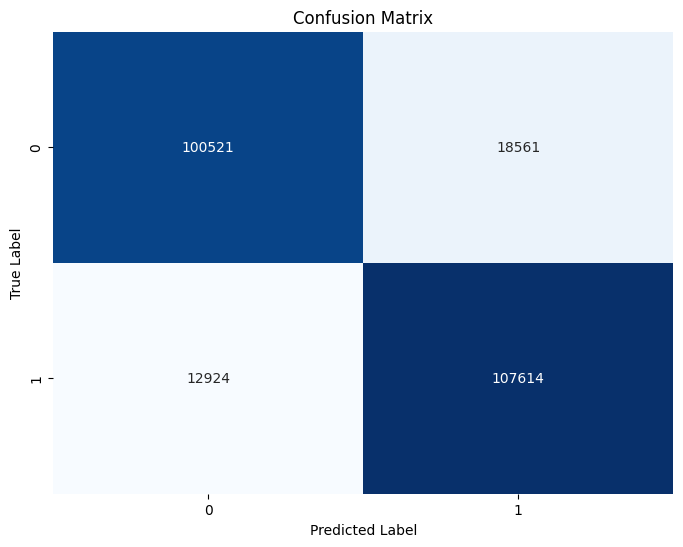

In [32]:
from sklearn.metrics import confusion_matrix
# Assuming `model` is your trained model and `X_test` is your test data
# Get model predictions
#y_pred = abs(model.predict(X_test))
#y_pred_binary = np.round(y_pred).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# PART 4

In [33]:
import numpy as np

def predict_offensiveness(text, model, tokenizer, max_sequence_length = 83):
    
    # Tokenize the input text
    sequences = tokenizer.texts_to_sequences([text])
    
    # Pad sequences to the maximum sequence length
    padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding = 'post', truncating = 'post')
    
    # Make predictions
    predictions = model.predict(padded_sequences)
    
    # Return prediction probabilities
    if np.round(np.abs(predictions[0][0])) == 0:
        return "Non-Offensive"
    elif np.round(np.abs(predictions[0][0])) == 1:
        return "Offensive"
    else:
        return "None"


# Using the function
input_text1 = "Priyanshu is a nice boy he lives very neatly he is a clean freak"
input_text2 = "Your opinion is noted. Very noted. Like, at the bottom of a really long list of priorities."
input_text3 = "I bless them to live longer"
input_text4 = "They should rot in hell"
input_text5 = "I have to ask why was star wars iii was even nominated"
prediction_probability1 = predict_offensiveness(input_text1,model,tokenizer)
prediction_probability2 = predict_offensiveness(input_text2,model,tokenizer)
prediction_probability3 = predict_offensiveness(input_text3,model,tokenizer)
prediction_probability4 = predict_offensiveness(input_text4,model,tokenizer)
prediction_probability5 = predict_offensiveness(input_text5,model,tokenizer)

print("Output 1 :",input_text1,':\n' ,prediction_probability1)
print("Output 2 :",input_text2, ':\n',prediction_probability2)
print("Output 3 :",input_text3,':\n' ,prediction_probability3)
print("Output 4 :",input_text4,':\n' ,prediction_probability4)
print("Output 5 :",input_text5, ':\n',prediction_probability5)

1/1 [==============================] - 0s 25ms/step
Output 1 : Priyanshu is a nice boy he lives very neatly he is a clean freak :
 Non-Offensive
Output 2 : Your opinion is noted. Very noted. Like, at the bottom of a really long list of priorities. :
 Non-Offensive
Output 3 : I bless them to live longer :
 Non-Offensive
Output 4 : They should rot in hell :
 Offensive
Output 5 : I have to ask why was star wars iii was even nominated :
 Non-Offensive


In [35]:
import pickle
with open('predict_pickle', 'wb') as f:
    pickle.dump(predict_offensiveness, f)

In [ ]:
# Saving the model
from tensorflow.keras.models import save_model

# Assuming 'model' is your trained LSTM model
save_model(model, 'path_to_save_model.h5')

C:\Users\Hellboy\AppData\Local\Temp\ipykernel_6324\2875872929.py:5: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, 'path_to_save_model.h5')
